In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [9]:
reeses = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)


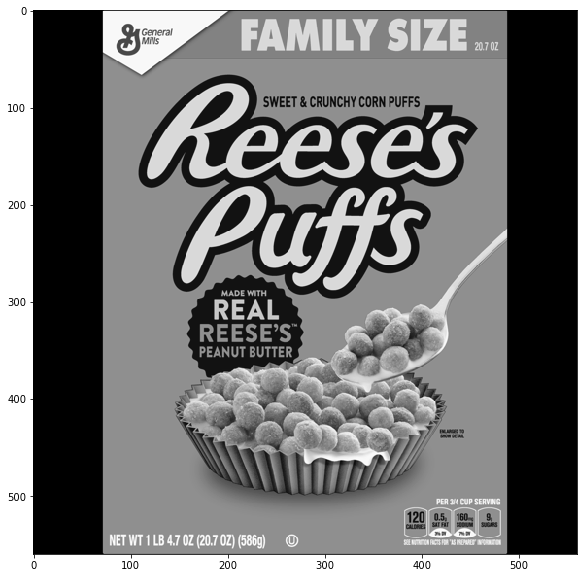

In [10]:
display(reeses)

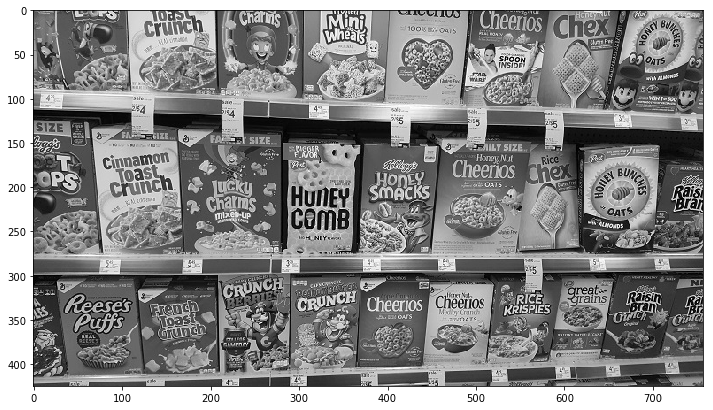

In [11]:
cereals = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display(cereals)

In [13]:
orb = cv2.ORB_create()

In [16]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)


In [17]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [18]:
matches = bf.match(des1,des2)

In [19]:
matches = sorted(matches,key = lambda x: x.distance)

In [22]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

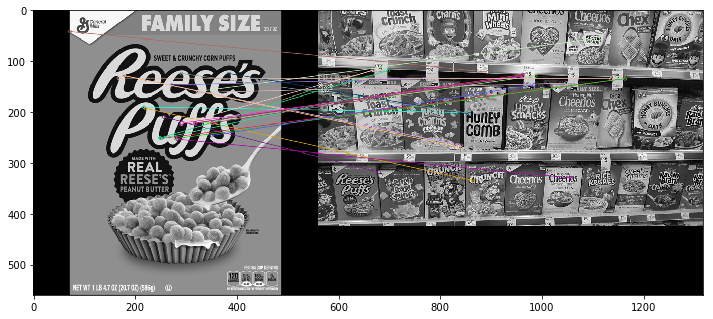

In [23]:
display(reeses_matches)

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

In [25]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)


In [26]:
bf = cv2.BFMatcher()

In [29]:
des1

array([[ 15.,   0.,   0., ...,  11.,   1.,   0.],
       [ 21.,   0.,   0., ...,   0.,  10.,  13.],
       [150.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 61.,   6.,   0., ...,   0.,   0.,   0.],
       [ 27.,   0.,   0., ...,   0.,   0.,   0.],
       [ 48.,   0.,   0., ...,   0.,   1.,   0.]], dtype=float32)

In [28]:
matches = bf.knnMatch(des1,des2,k = 2)

In [32]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        

In [33]:
good


[[<DMatch 000002CB16A088B0>],
 [<DMatch 000002CB16A08E70>],
 [<DMatch 000002CB16A08EB0>],
 [<DMatch 000002CB16A0D0F0>],
 [<DMatch 000002CB16A0D6F0>],
 [<DMatch 000002CB16A0D9F0>],
 [<DMatch 000002CB16A0DB70>],
 [<DMatch 000002CB16A0DEF0>],
 [<DMatch 000002CB16A51170>],
 [<DMatch 000002CB16A51530>],
 [<DMatch 000002CB16A51630>],
 [<DMatch 000002CB16A558F0>],
 [<DMatch 000002CB16A55930>],
 [<DMatch 000002CB16A55A30>],
 [<DMatch 000002CB16A5A7F0>],
 [<DMatch 000002CB16A5D1B0>],
 [<DMatch 000002CB16A5D270>],
 [<DMatch 000002CB16A5D330>],
 [<DMatch 000002CB16A5DBB0>],
 [<DMatch 000002CB16A5DCF0>],
 [<DMatch 000002CB16A5EE30>],
 [<DMatch 000002CB16A5EF70>],
 [<DMatch 000002CB16A5EFB0>],
 [<DMatch 000002CB16A631B0>],
 [<DMatch 000002CB16A631F0>],
 [<DMatch 000002CB16A68430>],
 [<DMatch 000002CB16A685B0>],
 [<DMatch 000002CB16A685F0>],
 [<DMatch 000002CB16A68BB0>],
 [<DMatch 000002CB16A68CB0>],
 [<DMatch 000002CB16A68D70>],
 [<DMatch 000002CB16A6A370>],
 [<DMatch 000002CB16A6A6F0>],
 [<DMatch 

In [34]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 2)

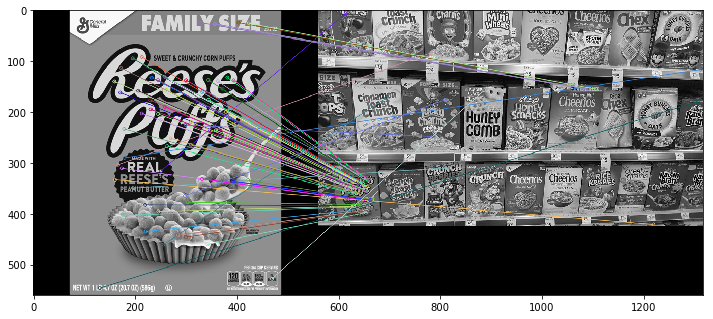

In [35]:
display(sift_matches)

In [36]:
sift = cv2.xfeatures2d.SIFT_create()

In [37]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)


In [39]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks = 50)

In [40]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [41]:
matches = flann.knnMatch(des1,des2,k=2)

In [42]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

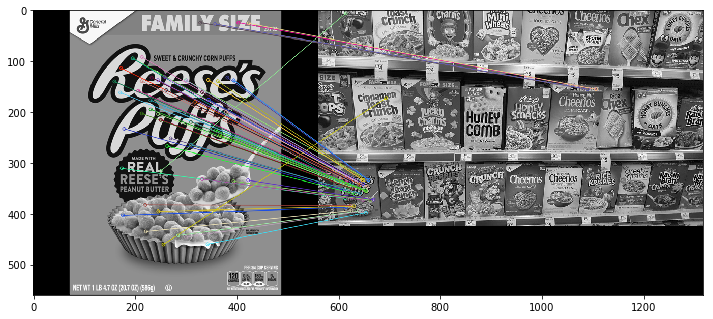

In [47]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags =2)
display(flann_matches)